<a href="https://colab.research.google.com/github/SamanvithaBolem/SamanvithaBolem/blob/main/Decision_tree_%26_Auto_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [5]:
data = pd.read_excel('/content/DecisionTree Sample.xlsx')

In [6]:
data.head()

,Ownership,Income,Credit Score,Default
0,Home Owner,Low,Below Average,0
1,Not Home Owner,Medium,Average,0
2,Not Home Owner,High,Below Average,1
3,Not Home Owner,High,High,0
4,Not Home Owner,High,Average,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ownership     21 non-null     object
 1   Income        21 non-null     object
 2   Credit Score  21 non-null     object
 3   Default       21 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 800.0+ bytes


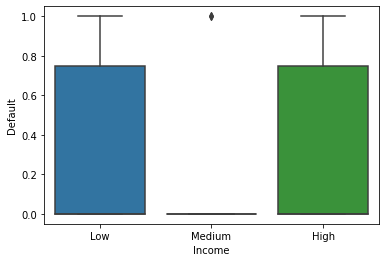

In [8]:
sns.boxplot(x=data['Income'],
            y=data['Default'])

In [9]:
from sklearn import preprocessing

In [10]:
label_encoder = preprocessing.LabelEncoder()

In [11]:
data['Ownership']= label_encoder.fit_transform(data['Ownership'])

In [12]:
data['Income']= label_encoder.fit_transform(data['Income'])

In [13]:
data['Credit Score']= label_encoder.fit_transform(data['Credit Score'])

In [14]:
data.head()

,Ownership,Income,Credit Score,Default
0,0,1,1,0
1,1,2,0,0
2,1,0,1,1
3,1,0,2,0
4,1,0,0,0


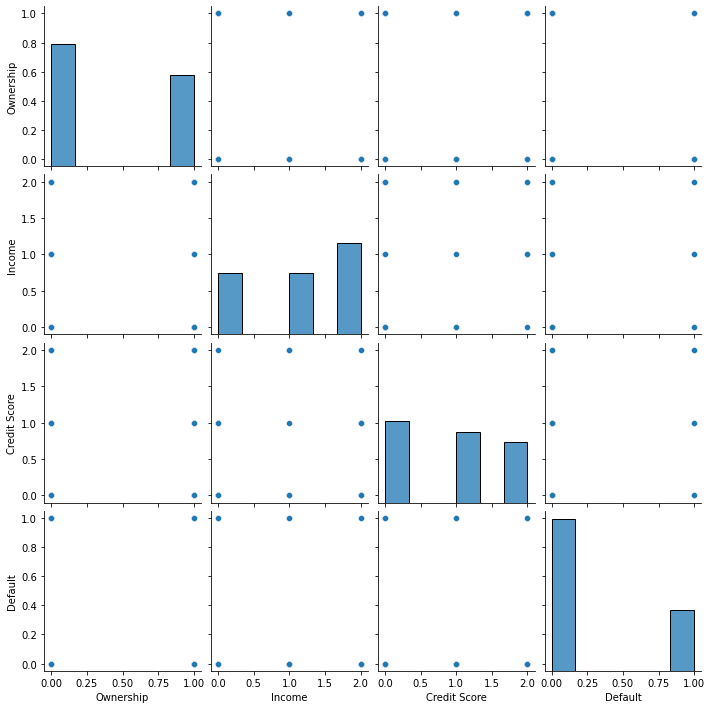

In [15]:
sns.pairplot(data)

In [16]:
data.columns

Index(['Ownership', 'Income', 'Credit Score', 'Default'], dtype='object')

In [17]:
x = data.loc[:,['Ownership', 'Income', 'Credit Score']]

y = data.loc[:,'Default']

SPLIT DATA


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.80,test_size=0.20)

In [20]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(16, 3)
(5, 3)
(16,)
(5,)


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model = DecisionTreeClassifier()

In [23]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [24]:
ypred = model.predict(xtest)

In [25]:
ytest

5     0
12    0
13    0
15    1
17    0
Name: Default, dtype: int64

In [26]:
ypred

array([0, 0, 0, 0, 0])

In [27]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

In [28]:
print(sklearn.metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
print(sklearn.metrics.accuracy_score(ytest,ypred))

0.8


In [30]:
print(sklearn.metrics.confusion_matrix(ytest,ypred))

[[4 0]
 [1 0]]


 **RANDOM FOREST**

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_model = RandomForestClassifier()

In [33]:
rf_model.fit(xtrain,ytrain)

RandomForestClassifier()

In [34]:
rf_ypred = rf_model.predict(xtest)

In [35]:
ytest

5     0
12    0
13    0
15    1
17    0
Name: Default, dtype: int64

In [36]:
rf_ypred

array([0, 0, 0, 0, 0])

In [37]:
print(sklearn.metrics.classification_report(ytest,rf_ypred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
print(sklearn.metrics.accuracy_score(ytest,rf_ypred))

0.8


In [39]:
pip install auto-sklearn

In [40]:
import autosklearn.classification

In [41]:
automl_model = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=60)

In [42]:
automl_model.fit(xtrain,ytrain)

[WARNING] [2021-09-20 14:58:06,850:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 1. Number of dummy models: 1
[WARNING] [2021-09-20 14:58:08,628:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 2. Number of dummy models: 1
[WARNING] [2021-09-20 14:58:10,435:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 3. Number of dummy models: 1
[WARNING] [2021-09-20 14:58:11,635:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 4. Number of dummy models: 1
[WARNING] [2021-09-20 14:58:12,647:Client-EnsembleBuilder] No models better than random - using Dummy loss!Number of models besides current dummy model: 5. Number of dummy models: 1
[WARNING] [2021-09-20 14:58:13,605:Client-EnsembleBuilder] No models better than random - 

AutoSklearnClassifier(per_run_time_limit=6, time_left_for_this_task=60)

In [43]:
automl_ypred = automl_model.predict(xtest)

In [44]:
automl_ypred

array([1, 0, 0, 0, 0])

In [45]:
ytest

5     0
12    0
13    0
15    1
17    0
Name: Default, dtype: int64

In [48]:
print(sklearn.metrics.classification_report(ytest,automl_ypred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg       0.60      0.60      0.60         5



In [49]:
print(sklearn.metrics.confusion_matrix(ytest,automl_ypred))

[[3 1]
 [1 0]]


In [50]:
print(sklearn.metrics.accuracy_score(ytest,automl_ypred))

0.6
